# Assignment 1

## Exercise 2
### Part 1
The network-function of the given neural network is denoted as follows:
$$y = \sigma(\overline{w}_3\sigma(W_2\sigma(W_1\overline{x})))$$
where $\overline{x}$ is the input vector, $W_i$ is the weight matrix for layer with indexes $i = \{1, 2\}$ and $\overline{w}_3$ is the weight vector for the last neuron.


### Part 2
The sum squared error function looks like the following:
$$E(y) = \sum_i \frac{1}{2}(y_i - \hat{y}_i)^2 \text{.}$$
The variable $y$ represents our estimated output and the variable $\hat{y}$ denotes the actual value. Inserting our formula from part $1$ yields
$$
E(X) = \sum_{\overline{x}_i\in X} \frac{1} {2}(\sigma(\overline{w}_3\sigma(W_2\sigma(W_1\overline{x}_i))) - \hat{y}_i)^2$$
where $X$ denotes our data set and $x_i$ is the $i$-th input vector.

### Part 3
$$\newcommand{\ov}[1]{\overline{#1}}$$
Let $$K(x) =  \sigma(W_2\sigma(W_1\overline{x}_i))$$ be all the parts independent of $w_3$. Thus
$$
\begin{align}
E(X)  = & \sum_{\overline{x}_i \in X}\frac{1}{2}\cdot(\sigma(w_3 \cdot K(\overline{x}_i)) - \hat{y}_i)^2\\ \text{and the gradient}\\
\nabla_{w_3} E(X) = & \sum_{\ov{x}_i} (\sigma(w_3 \cdot K(\ov{x}_i)) - \hat{y}_i) \cdot  (\nabla_{w_3}\sigma(w_3K(\ov{x}_i)))\\
\nabla_{w_3} E(X) = & \sum_{\ov{x}_i} (\sigma(w_3 \cdot K(\ov{x}_i)) - \hat{y}_i) \cdot  (K(\ov{x}_i) \cdot \sigma^\prime(w_3 \cdot K(\ov{x}_i)))\\
\nabla_{w_3} E(X) = & \sum_{\ov{x}_i} (\sigma(w_3 \cdot K(\ov{x}_i)) - \hat{y}_i)  \cdot \sigma^\prime(w_3 \cdot K(\ov{x}_i)) \cdot K(\ov{x}_i)
\end{align}$$

### Part 4
Given is the logistic function
$$\sigma(x) = \frac{1}{1+\mathcal{e}^{-x}} = (1 + \mathcal{e}^x)^{-1}.$$
Now we derive that function with respect to $x$:
$$
\begin{align}
\sigma^\prime(x) &= -(1 + \mathcal{e}^{x})^{-2} \cdot (-\mathcal{e}^{x}) &\text{// chain rule}\\
&= \frac{\mathcal{e}^{x}}{(1 + \mathcal{e}^{x})^2}\\
&= \frac{\mathcal{e}^{x}}{1 + 2\mathcal{e}^{x} + \mathcal{e}^{2x}}\\
\end{align}
$$

## Exercise 3
### Part 1

In [4]:
# Ex 3
# Copyright 2017 Rasmus

# Licensed under the "THE BEER-WARE LICENSE" (Revision 42):
# Rasmus wrote this file. As long as you retain this notice you
# can do whatever you want with this stuff. If we meet some day, and you think
# this stuff is worth it, you can buy me a beer or coffee in return

import numpy as np
from numpy.random import normal
from scipy.special import expit as logistic
from matplotlib import pyplot as plt
np.random.seed(1)

sample_size = 60

% matplotlib notebook

### Part 3, 4, 5, 6, 7, 8, 9 + Exercise 5

Note: It is recommended to peruse the `.py` file uploaded as well, since I have not adapted the code to a notebook format.

<IPython.core.display.Javascript object>


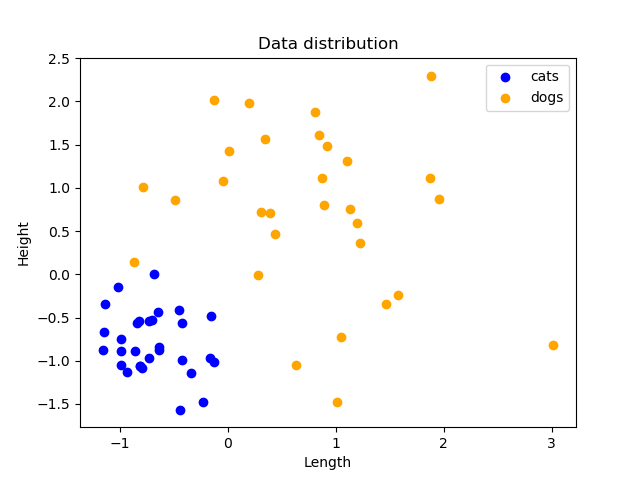

<IPython.core.display.Javascript object>


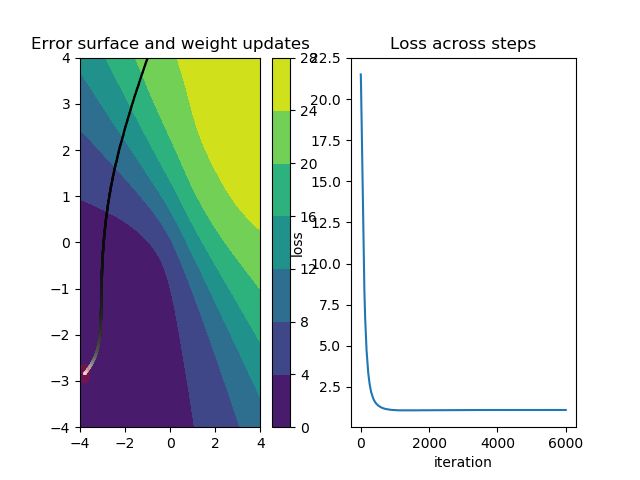

Final weights and loss: [[-3.782653   -2.84166166]], 1.0947597243893374


In [5]:
# Note to the reader: Exercise sheet specifies to use a variance of V in the
# text, but then uses an std of V in the code
def dog_distribution(shape):
    '''Sample from normal pdf with µ=45 AND σ=15
    Parameters
    ----------
    shape   :   tuple
                Shape of array to fill
    Returns
    -------
    np.ndarray
            Array of specified shape sampled from distribution of
    '''
    return normal(45, 15, shape)


def cat_distribution(shape):
    '''Sample from normal pdf with µ=25 AND σ=5
    Parameters
    ----------
    shape   :   tuple
                Shape of array to fill
    Returns
    -------
    np.ndarray
            Array of specified shape sampled from distribution of
    '''
    return normal(25, 5, shape)


def logistic_derivative(batch):
    '''Derivative of the logistic (expit) function, derived by hand
    Parameters
    ----------
    batch   :   np.ndarray of dimension 1
                Values to pump through this function
    Returns
    -------
    np.ndarray
    '''
    # f(x) = e^x / (1+e^x)^2
    # this can operate on entire arrays elementwise
    e = np.exp(batch)
    return e / np.square(1 + e)


def forward_pass(W, batch):
    '''Propagate data through the network given by W.
    Parameters
    ----------
    W   :   np.ndarray
            Array of shape (1, 2) giving the network weights
    batch   :   np.ndarray
                Array of shape (N, 2) with the data

    Returns
    -------
    np.ndarray
            Network predictions for each sample in shape (N, 1)
    '''
    # sanity check our shapes
    assert batch.shape[1] == 2, 'Data shape is incorrect'
    assert W.shape == (1, 2), 'Weights shape is incorrect'
    return logistic(np.dot(W, batch.T)).T


def loss_function(predictions, targets):
    '''Calculate sum of squared error loss.
    Parameters
    ----------
    predictions     :   np.ndarray
                        Array of values from [0,1] (the model output)
    targets     :   np.ndarray
                    Target values, of same shape and dtype as `predictions`
    Returns
    -------
    double
        SSE-Loss, summed over all rows

    '''
    return 0.5 * np.sum(np.square(predictions - targets))


def gradient_loss(W, batch, targets):
    '''Compute the gradient of the loss function with respect to W.
    Parameters
    ----------
    W   :   np.ndarray
            Weight matrix of shape (1, 2)
    batch   :   np.ndarray
                Data to compute the loss on, of shape (N, 2)
    targets :   np.ndarray
                Targets of shape (N, 1)
    Returns
    -------
    np.ndarray
            Gradient vector of shape (1, 2), averaged accross the data set
    '''
    assert batch.shape[1] == 2, 'Data shape is incorrect'
    # we want to take the scalar product of the weights with each data row, so
    # we must transpose the data to get (1, 2) x (2, N) => (1, N)
    e = np.exp(-np.dot(W, batch.T))
    # refer to the lecture slides, gradient for only one layer consists of only
    # 3 terms. More layers lead to more chain rules and more terms
    term_1 = forward_pass(W, batch) - targets   # shape (N, 1)
    term_2 = - logistic_derivative(batch)       # shape (N, 1)
    term_3 = batch                              # shape (N, 2)
    grad = term_1 * term_2 * term_3             # term_3 is broadcast (stacked)
    return np.mean(grad, axis=0)


def batches(data, targets, size):
    '''Generate minibatches from data and targets.
    Parameters
    ----------
    data    :   np.ndarray
                Array of shape (N, 2)
    targets :   np.ndarray
                Array of classes of shape (N, 1)
    size    :   int
                Batch size. Must be >= 1
    Yields
    -------
    tuple
        Tuple of (data_batch, target_batch) subarrays
    '''
    assert size >= 1, 'Batch size must be positive'
    assert data.shape[1] == 2, 'Data shape is incorrect'
    data_len = data.shape[0]
    # make one array of data + targets to shuffle at the same time
    data_targets = np.concatenate((data, targets), axis=1)
    np.random.shuffle(data_targets)
    data = data_targets[:, :2]  # retrieve shuffled data
    targets = data_targets[:, 2:]   # retrieve shuffled targets and keep (N, 1)
    # shape instead of 1d shape
    # we go accross the rows in leaps
    for i in range(0, data_len // size):
        start = i * size
        end = min(start + size, data_len)   # len may not be evenly divided
        # yield tuple taken from the original array
        yield data[start:end, :], targets[start:end, :]


def train(data, targets, epochs=1000, learning_rate=0.1, bs=10,
          W=np.array([[-2.5, -2.5]]), momentum=0.5):
    '''Train the network.
    Parameters
    ----------
    data    :   np.ndarray
                Array of shape (N, 2)
    targets :   np.ndarray
                Array of classes of shape (N, 1)
    epochs  :   int
                Number of times to go over the entire dataset in batches
    learning_rate   :   float
                        Backprop leraning learning rate
    bs  :   int
            Batch size
    W   :   np.ndarray
            Intitial weights of shape (1, 2)
    momentum    :   float
                    Momentum parameter

    Returns
    -------
    W   :   np.ndarray
            Final weights of shape (1, 2)
    all_Ws  :   np.ndarray
                Array of all weight update steps, of shape (_, 2)

    '''
    # number of times the weights are updated
    n_iter = epochs * (len(targets) // bs) + len(targets) % bs
    # iteration number
    i = 0
    # record all weight updates for later plotting
    all_Ws = np.zeros((n_iter, 2))

    delta_w = np.zeros((1, 2))

    for epoch in range(epochs):
        # one epoch means going over the entire dataset once
        for batch, batch_targets in batches(data, targets, bs):
            # record current weights
            all_Ws[i, :] = W
            i += 1
            gradient = gradient_loss(W, batch, batch_targets)
            # I don't know why I need the +-sign instead of minus, there seems
            # to be an error somewhere
            delta_w = momentum * delta_w + learning_rate * gradient
            W = W + delta_w
        # loss = loss_function(forward_pass(W, data), targets)
        # print('W={}, loss={}'.format(W, loss))
    return W, all_Ws


def generate_error_surf_plot(data, targets, limits_x=(-4, 4), limits_y=(-4, 4)):
    '''Create a contour plot of the error surface for the loss function defined
    above.
    Parameters
    ----------
    data    :   np.ndarray
                Array of shape (N, 2)
    targets :   np.ndarray
                Array of classes of shape (N, 1)
    limits_x    :   tuple
                    Limits for the X-axis
    limits_y    :   tuple
                    Limits for the Y-axis
    Returns
    -------
    plt.Figure
        Figure with one of two subplots filled in

    '''
    f = plt.figure()
    # subplot array of (1, 2), subplot 1
    ax = f.add_subplot(121)
    # step size for plot
    delta = 0.05
    w1 = np.arange(limits_x[0], limits_x[1] + delta, delta)
    w2 = np.arange(limits_y[0], limits_y[1] + delta, delta)
    Z = np.zeros((len(w2), len(w1)))
    # now we fill the value array which has for each pair of w1, w2 the loss for
    # those weights
    for xi in np.arange(len(w1)):
        for yi in np.arange(len(w2)):
            W = np.array([[w1[xi], w2[yi]]])
            Z[yi, xi] = loss_function(forward_pass(W, data), targets)
    cp = ax.contourf(w1, w2, Z)
    ax.set_xlim(limits_y)
    ax.set_ylim(limits_x)
    f.colorbar(cp, ax=ax)
    return f


def main():
    ##########################################################################
    #                              Generate data                               #
    ##########################################################################
    x_cat = cat_distribution((sample_size // 2, 2))
    x_dog = dog_distribution((sample_size // 2, 2))

    ##########################################################################
    #                              Normalize data                              #
    ##########################################################################
    # Shouldn't this be done per dimension?
    mean = np.mean([x_cat, x_dog])
    std = np.std([x_cat, x_dog])

    # not equivalent ???????
    # x_cat -=  mean
    # x_dog -= mean
    # x_cat /= std
    # x_dog /= std
    x_cat = (x_cat - mean) / std
    x_dog = (x_dog - mean) / std

    ##########################################################################
    #                               Plot dataset                               #
    ##########################################################################
    f = plt.figure()
    ax = f.add_subplot(1, 1, 1)
    ax.set_title('Data distribution')
    ax.set_xlabel('Length')
    ax.set_ylabel('Height')
    ax.scatter(x_cat[:, 0], x_cat[:, 1], c='blue', label='cats')
    ax.scatter(x_dog[:, 0], x_dog[:, 1], c='orange', label='dogs')
    ax.legend()

    ##########################################################################
    #                             Generate targets                             #
    ##########################################################################
    data = np.concatenate((x_cat, x_dog), axis=0)
    # 1 = CAT, 0 = DOG
    targets_cats = np.ones((sample_size // 2, 1))
    targets_dogs = np.zeros((sample_size // 2, 1))
    targets = np.concatenate((targets_cats, targets_dogs), axis=0)

    ##########################################################################
    #                               Do training                                #
    ##########################################################################
    figure_surf = generate_error_surf_plot(data, targets)
    final_W, all_Ws = train(data, targets, epochs=1000, W=np.array([[-1, 4]]))
    print('Final weights and loss: {}, {}'.format(
        final_W, loss_function(forward_pass(final_W, data), targets)))
    ############################################################################
    #                  Create surface plot and show progress                   #
    ############################################################################
    # marker for final weights
    circle = plt.Circle(
        (final_W[0, 0], final_W[0, 1]), 0.2, color='r', alpha=0.2)
    plot_surf = figure_surf.gca()
    plot_surf.set_title('Error surface and weight updates')
    # shapes are 'Artists' in pyplot speak
    plot_surf.add_artist(circle)
    # dots change color from black to white
    plot_surf.scatter(all_Ws[:, 0], all_Ws[:, 1],
                      c=np.linspace(0.0, 1.0, all_Ws.shape[0]),
                      cmap='gray', s=0.5)
    ############################################################################
    #                       Create a plot for the loss                         #
    ############################################################################
    plot_loss = figure_surf.add_subplot(122)
    all_losses = np.apply_along_axis(lambda W: loss_function(
        forward_pass(np.array([W]), data), targets), 1, all_Ws)
    plot_loss.plot(np.arange(all_Ws.shape[0]), all_losses)
    plot_loss.set_title('Loss across steps')
    plot_loss.set_xlabel('iteration')
    plot_loss.set_ylabel('loss')

    plt.show()

if __name__ == "__main__":
    main()
